In [0]:
spark.conf.set("spark.sql.shuffle.partitions", "8")  # Optimize for small datasets

In [0]:
%sh
rm -r /dbfs/dbtopbi
mkdir /dbfs/dbtopbi
wget -O /dbfs/dbtopbi/2019.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2019_edited.csv
wget -O /dbfs/dbtopbi/2020.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2020_edited.csv
wget -O /dbfs/dbtopbi/2021.csv https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2021_edited.csv

--2025-07-16 00:40:42--  https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2019_edited.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123385 (120K) [text/plain]
Saving to: ‘/dbfs/dbtopbi/2019.csv’

     0K .......... .......... .......... .......... .......... 41% 5.00M 0s
    50K .......... .......... .......... .......... .......... 82% 14.5M 0s
   100K .......... ..........                                 100% 10.2M=0.02s

2025-07-16 00:40:42 (7.80 MB/s) - ‘/dbfs/dbtopbi/2019.csv’ saved [123385/123385]

--2025-07-16 00:40:43--  https://raw.githubusercontent.com/MicrosoftLearning/mslearn-databricks/main/data/2020_edited.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.13

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
])

df_2019 = spark.read.load('dbfs:/dbtopbi/2019.csv', format='csv', schema=orderSchema)
df_2020 = spark.read.load('dbfs:/dbtopbi/2020.csv', format='csv', schema=orderSchema)
df_2021 = spark.read.load('dbfs:/dbtopbi/2021.csv', format='csv', schema=orderSchema)

In [0]:
df_2019.printSchema()
df_2019.show(5)

df_2020.printSchema()
df_2020.show(5)

df_2021.printSchema()
df_2021.show(5)

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+
|         SO43701|                   1|2019-07-01|   Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99|271.9992|
|         SO43704|                   1|2019-07-01|    Julio Ruiz|julio1@advent

In [0]:
from pyspark.sql import functions as F

df_2019.describe().show()
df_2019.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_2019.columns]).show()

df_2020.describe().show()
df_2020.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_2020.columns]).show()

df_2021.describe().show()
df_2021.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df_2021.columns]).show()

+-------+----------------+--------------------+-------------+--------------------+--------------------+--------+-----------------+-----------------+
|summary|SalesOrderNumber|SalesOrderLineNumber| CustomerName|               Email|                Item|Quantity|        UnitPrice|              Tax|
+-------+----------------+--------------------+-------------+--------------------+--------------------+--------+-----------------+-----------------+
|  count|            1210|                1210|         1210|                1210|                1210|    1210|             1210|             1173|
|   mean|            NULL|                 1.0|         NULL|                NULL|                NULL|     1.0|3215.951080170939|257.1104334532859|
| stddev|            NULL|                 0.0|         NULL|                NULL|                NULL|     0.0|906.2821916951316|72.80903367117928|
|    min|         SO43697|                   1|Aaron Collins|aaron11@adventure...|Mountain-100 Blac...|   

In [0]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import col

df_2019 = df_2019.withColumn('Year', lit(2019))
df_2019 = df_2019.withColumn("Total", col('Quantity') * col('UnitPrice'))
df_2020 = df_2020.withColumn('Year', lit(2020))
df_2020 = df_2020.withColumn("Total", col('Quantity') * col('UnitPrice'))
df_2021 = df_2021.withColumn('Year', lit(2021))
df_2021 = df_2021.withColumn("Total", col('Quantity') * col('UnitPrice'))

df_2019.show(5)
df_2020.show(5)
df_2021.show(5)

+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+----+--------+
|SalesOrderNumber|SalesOrderLineNumber| OrderDate|  CustomerName|               Email|                Item|Quantity|UnitPrice|     Tax|Year|   Total|
+----------------+--------------------+----------+--------------+--------------------+--------------------+--------+---------+--------+----+--------+
|         SO43701|                   1|2019-07-01|   Christy Zhu|christy12@adventu...|Mountain-100 Silv...|       1|  3399.99|271.9992|2019| 3399.99|
|         SO43704|                   1|2019-07-01|    Julio Ruiz|julio1@adventure-...|Mountain-100 Blac...|       1|  3374.99|269.9992|2019| 3374.99|
|         SO43705|                   1|2019-07-01|     Curtis Lu|curtis9@adventure...|Mountain-100 Silv...|       1|  3399.99|271.9992|2019| 3399.99|
|         SO43700|                   1|2019-07-01|  Ruben Prasad|ruben10@adventure...|  Road-650 Bla

In [0]:
df_2019.write.format('delta').mode('overwrite').saveAsTable('sales_data_2019')
df_2020.write.format('delta').mode('overwrite').saveAsTable('sales_data_2020')
df_2021.write.format('delta').mode('overwrite').saveAsTable('sales_data_2021')

df_all = df_2019.unionByName(df_2020).unionByName(df_2021)
df_all.write.format('delta').mode('overwrite').saveAsTable('sales_data_all_years')

In [0]:
product_yearly_sales = df_all.groupBy('Year', 'Item') \
    .agg(sum('Total').alias('TotalSales'),
    avg('Total').alias('AvgSales'), \
    count('*').alias('TotalCount'))
    
display(product_yearly_sales.orderBy('Year', 'Item'))

Year Item TotalSales AvgSales TotalCount 2019 Mountain-100 Black, 38 77624.76977539062 3374.989990234375 23 2019 Mountain-100 Black, 42 87749.73974609375 3374.989990234375 26 2019 Mountain-100 Black, 44 124874.62963867188 3374.989990234375 37 2019 Mountain-100 Black, 48 80999.759765625 3374.989990234375 24 2019 Mountain-100 Silver, 38 132599.60961914062 3399.989990234375 39 2019 Mountain-100 Silver, 42 71399.78979492188 3399.989990234375 21 2019 Mountain-100 Silver, 44 105399.68969726562 3399.989990234375 31 2019 Mountain-100 Silver, 48 47599.85986328125 3399.989990234375 14 2019 Road-150 Red, 44 561788.3930664062 3578.27001953125 157 2019 Road-150 Red, 48 640510.3334960938 3578.27001953125 179 2019 Road-150 Red, 52 558210.123046875 3578.27001953125 156 2019 Road-150 Red, 56 601149.36328125 3578.27001953125 168 2019 Road-150 Red, 62 704919.1938476562 3578.27001953125 197 2019 Road-650 Black, 44 9787.374877929688 699.0982055664062 14 2019 Road-650 Black, 48 2796.392822265625 699.0982055664062 4 2019 Road-650 Black, 52 13981.964111328125 699.0982055664062 20 2019 Road-650 Black, 58 7690.080261230469 699.0982055664062 11 2019 Road-650 Black, 60 10486.473083496094 699.0982055664062 15 2019 Road-650 Black, 62 11185.5712890625 699.0982055664062 16 2019 Road-650 Red, 44 6291.883850097656 699.0982055664062 9 2019 Road-650 Red, 48 9088.276672363281 699.0982055664062 13 2019 Road-650 Red, 52 6990.9820556640625 699.0982055664062 10 2019 Road-650 Red, 58 6291.883850097656 699.0982055664062 9 2019 Road-650 Red, 60 9088.276672363281 699.0982055664062 13 2019 Road-650 Red, 62 2796.392822265625 699.0982055664062 4 2020 Mountain-100 Black, 38 94499.7197265625 3374.989990234375 28 2020 Mountain-100 Black, 42 67499.7998046875 3374.989990234375 20 2020 Mountain-100 Black, 44 84374.74975585938 3374.989990234375 25 2020 Mountain-100 Black, 48 111374.66967773438 3374.989990234375 33 2020 Mountain-100 Silver, 38 64599.809814453125 3399.989990234375 19 2020 Mountain-100 Silver, 42 71399.78979492188 3399.989990234375 21 2020 Mountain-100 Silver, 44 74799.77978515625 3399.989990234375 22 2020 Mountain-100 Silver, 48 74799.77978515625 3399.989990234375 22 2020 Mountain-200 Black, 38 131142.28125 2049.09814453125 64 2020 Mountain-200 Black, 42 196713.421875 2049.09814453125 96 2020 Mountain-200 Black, 46 206958.91259765625 2049.09814453125 101 2020 Mountain-200 Silver, 38 176070.67260742188 2071.419677734375 85 2020 Mountain-200 Silver, 42 159499.31518554688 2071.419677734375 77 2020 Mountain-200 Silver, 46 128428.02001953125 2071.419677734375 62 2020 Road-150 Red, 44 443705.482421875 3578.27001953125 124 2020 Road-150 Red, 48 565366.6630859375 3578.27001953125 158 2020 Road-150 Red, 52 526005.6928710938 3578.27001953125 147 2020 Road-150 Red, 56 458018.5625 3578.27001953125 128 2020 Road-150 Red, 62 497379.53271484375 3578.27001953125 139 2020 Road-250 Black, 44 172343.4375 2181.5625 79 2020 Road-250 Black, 48 209430.0 2181.5625 96 2020 Road-250 Black, 52 253061.25 2181.5625 116 2020 Road-250 Black, 58 181069.6875 2181.5625 83 2020 Road-250 Red, 44 207684.75830078125 2443.35009765625 85 2020 Road-250 Red, 48 256551.76025390625 2443.35009765625 105 2020 Road-250 Red, 52 217458.15869140625 2443.35009765625 89 2020 Road-250 Red, 58 263969.0625 2181.5625 121 2020 Road-550-W Yellow, 38 29012.6875 1000.4375 29 2020 Road-550-W Yellow, 40 37016.1875 1000.4375 37 2020 Road-550-W Yellow, 42 38016.625 1000.4375 38 2020 Road-550-W Yellow, 44 31013.5625 1000.4375 31 2020 Road-550-W Yellow, 48 36015.75 1000.4375 36 2020 Road-650 Black, 44 23685.447204589844 764.0466840190272 31 2020 Road-650 Black, 48 22315.214721679688 743.8404907226562 30 2020 Road-650 Black, 52 30229.006408691406 755.7251602172852 40 2020 Road-650 Black, 58 29166.37713623047 767.5362404271176 38 2020 Road-650 Black, 60 29446.01641845703 755.0260620117188 39 2020 Road-650 Black, 62 22119.467224121094 762.7402491076239 29 2020 Road-650 Red, 44 27097.046447753906 752.6957346598307 36 2020 Road-650 Red

In [0]:
product_total_sales = df_all.groupBy('Year') \
    .agg(sum('Total').alias('TotalSales'),
    avg('Total').alias('AvgSales'), \
    count('*').alias('TotalCount'))
    
display(product_total_sales.orderBy('Year'))

Year TotalSales AvgSales TotalCount 2019 3891300.807006836 3215.951080170939 1210 2020 6385382.668884277 2332.1339185114234 2738 2021 1.0698686067145348E7 371.6370038608221 28788

In [0]:
customer_yearly_sales = df_all.groupBy("CustomerName", "Year").agg(
    sum("Total").alias("TotalSales"),
    avg("Total").alias("AvgSaleAmount"),
    count("*").alias("TransactionCount")
)

display(customer_yearly_sales.orderBy('CustomerName', 'Year'))

CustomerName Year TotalSales AvgSaleAmount TransactionCount Aaron Adams 2021 117.9600031375885 29.490000784397125 4 Aaron Allen 2020 3399.989990234375 3399.989990234375 1 Aaron Bryant 2021 133.96000289916992 26.792000579833985 5 Aaron Chen 2021 39.98000144958496 19.99000072479248 2 Aaron Collins 2019 3578.27001953125 3578.27001953125 1 Aaron Diaz 2019 3578.27001953125 3578.27001953125 1 Aaron Diaz 2021 2451.300097465515 1225.6500487327576 2 Aaron Edwards 2021 94.4799976348877 47.23999881744385 2 Aaron Evans 2021 2433.040069580078 608.2600173950195 4 Aaron Flores 2019 699.0982055664062 699.0982055664062 1 Aaron Flores 2021 839.4599914550781 209.86499786376953 4 Aaron Foster 2021 2430.439992904663 486.0879985809326 5 Aaron Green 2021 27.27999973297119 13.639999866485596 2 Aaron Griffin 2021 71.58000016212463 23.860000054041546 3 Aaron Hall 2021 28.989999771118164 28.989999771118164 1 Aaron Hayes 2021 782.989990234375 782.989990234375 1 Aaron Hill 2021 35.959999084472656 11.986666361490885 3 Aaron Hughes 2020 2049.09814453125 2049.09814453125 1 Aaron Jenkins 2021 119.97999954223633 59.989999771118164 2 Aaron King 2021 4758.0300579071045 793.0050096511841 6 Aaron Kumar 2021 2049.09814453125 2049.09814453125 1 Aaron Li 2020 782.989990234375 782.989990234375 1 Aaron McDonald 2021 119.97999954223633 59.989999771118164 2 Aaron Nelson 2020 2071.419677734375 2071.419677734375 1 Aaron Nelson 2021 810.3199768066406 202.57999420166016 4 Aaron Patterson 2021 1184.4599916934967 296.1149979233742 4 Aaron Perez 2021 191.2799997329712 63.759999910990395 3 Aaron Perry 2021 71.97000122070312 35.98500061035156 2 Aaron Phillips 2021 39.98000144958496 19.99000072479248 2 Aaron Powell 2021 4.989999771118164 4.989999771118164 1 Aaron Roberts 2021 119.97999954223633 59.989999771118164 2 Aaron Ross 2021 2376.959991455078 792.3199971516927 3 Aaron Scott 2021 2492.320098876953 623.0800247192383 4 Aaron Shan 2021 68.97000122070312 22.990000406901043 3 Aaron Simmons 2021 85.47999954223633 42.739999771118164 2 Aaron Wang 2020 3578.27001953125 3578.27001953125 1 Aaron Wang 2021 2366.4599895477295 788.8199965159098 3 Aaron Washington 2021 4.989999771118164 4.989999771118164 1 Aaron Wright 2020 3578.27001953125 3578.27001953125 1 Aaron Wright 2021 7235.360158920288 904.420019865036 8 Aaron Young 2020 3578.27001953125 3578.27001953125 1 Aaron Young 2021 2445.4599895477295 489.0919979095459 5 Aaron Zhang 2021 600.4599916934967 150.11499792337418 4 Abby Arthur 2020 3578.27001953125 3578.27001953125 1 Abby Fernandez 2021 35.0 35.0 1 Abby Garcia 2021 1293.3299770355225 431.10999234517413 3 Abby Gonzalez 2021 616.9499912261963 123.38999824523925 5 Abby Kapoor 2021 751.3399753570557 375.66998767852783 2 Abby Kov r 2021 600.4599916934967 150.11499792337418 4 Abby Lopez 2021 56.970001220703125 28.485000610351562 2 Abby Martinez 2021 54.98000144958496 27.49000072479248 2 Abby Mehta 2021 21.979999542236328 21.979999542236328 1 Abby Patel 2021 2071.419677734375 2071.419677734375 1 Abby Perez 2021 92.47999978065491 30.826666593551636 3 Abby Raman 2021 2071.419677734375 2071.419677734375 1 Abby Sai 2019 3399.989990234375 3399.989990234375 1 Abby Sai 2021 4862.5300579071045 810.4216763178507 6 Abby Sanchez 2020 3578.27001953125 3578.27001953125 1 Abby Sanchez 2021 2443.35009765625 2443.35009765625 1 Abby Sandberg 2019 3578.27001953125 3578.27001953125 1 Abby Subram 2021 5061.83966088295 562.4266289869944 9 Abhijit Thakur 2021 27.27999973297119 13.639999866485596 2 Abigail Alexander 2021 32.27999973297119 16.139999866485596 2 Abigail Bailey 2021 2071.419677734375 2071.419677734375 1 Abigail Barnes 2021 1372.9499816894531 274.5899963378906 5 Abigail Bell 2021 71.97000122070312 35.98500061035156 2 Abigail Bennett 2021 2.2899999618530273 2.2899999618530273 1 Abigail Brooks 2020 3578.27001953125 3578.27001953125 1 Abigail Brooks 2021 2319.989990234375 2319.989990234375 1 Abigail Bryant 2021 539.989990234375 539.989990234375 1 Abigail Butler 2021 1779.46999168396 593.1566638946533 

In [0]:
customer_total_sales = df_all.groupBy("CustomerName").agg(
    sum("Total").alias("TotalSales"),
    avg("Total").alias("AvgSaleAmount"),
    count("*").alias("TransactionCount")
)

display(customer_total_sales.orderBy('CustomerName'))

CustomerName TotalSales AvgSaleAmount TransactionCount Aaron Adams 117.9600031375885 29.490000784397125 4 Aaron Allen 3399.989990234375 3399.989990234375 1 Aaron Bryant 133.96000289916992 26.792000579833985 5 Aaron Chen 39.98000144958496 19.99000072479248 2 Aaron Collins 3578.27001953125 3578.27001953125 1 Aaron Diaz 6029.570116996765 2009.8567056655884 3 Aaron Edwards 94.4799976348877 47.23999881744385 2 Aaron Evans 2433.040069580078 608.2600173950195 4 Aaron Flores 1538.5581970214844 307.7116394042969 5 Aaron Foster 2430.439992904663 486.0879985809326 5 Aaron Green 27.27999973297119 13.639999866485596 2 Aaron Griffin 71.58000016212463 23.860000054041546 3 Aaron Hall 28.989999771118164 28.989999771118164 1 Aaron Hayes 782.989990234375 782.989990234375 1 Aaron Hill 35.959999084472656 11.986666361490885 3 Aaron Hughes 2049.09814453125 2049.09814453125 1 Aaron Jenkins 119.97999954223633 59.989999771118164 2 Aaron King 4758.0300579071045 793.0050096511841 6 Aaron Kumar 2049.09814453125 2049.09814453125 1 Aaron Li 782.989990234375 782.989990234375 1 Aaron McDonald 119.97999954223633 59.989999771118164 2 Aaron Nelson 2881.7396545410156 576.3479309082031 5 Aaron Patterson 1184.4599916934967 296.1149979233742 4 Aaron Perez 191.2799997329712 63.759999910990395 3 Aaron Perry 71.97000122070312 35.98500061035156 2 Aaron Phillips 39.98000144958496 19.99000072479248 2 Aaron Powell 4.989999771118164 4.989999771118164 1 Aaron Roberts 119.97999954223633 59.989999771118164 2 Aaron Ross 2376.959991455078 792.3199971516927 3 Aaron Scott 2492.320098876953 623.0800247192383 4 Aaron Shan 68.97000122070312 22.990000406901043 3 Aaron Simmons 85.47999954223633 42.739999771118164 2 Aaron Wang 5944.7300090789795 1486.1825022697449 4 Aaron Washington 4.989999771118164 4.989999771118164 1 Aaron Wright 10813.630178451538 1201.514464272393 9 Aaron Young 6023.7300090789795 1003.9550015131632 6 Aaron Zhang 600.4599916934967 150.11499792337418 4 Abby Arthur 3578.27001953125 3578.27001953125 1 Abby Fernandez 35.0 35.0 1 Abby Garcia 1293.3299770355225 431.10999234517413 3 Abby Gonzalez 616.9499912261963 123.38999824523925 5 Abby Kapoor 751.3399753570557 375.66998767852783 2 Abby Kov r 600.4599916934967 150.11499792337418 4 Abby Lopez 56.970001220703125 28.485000610351562 2 Abby Martinez 54.98000144958496 27.49000072479248 2 Abby Mehta 21.979999542236328 21.979999542236328 1 Abby Patel 2071.419677734375 2071.419677734375 1 Abby Perez 92.47999978065491 30.826666593551636 3 Abby Raman 2071.419677734375 2071.419677734375 1 Abby Sai 8262.52004814148 1180.3600068773542 7 Abby Sanchez 6021.6201171875 3010.81005859375 2 Abby Sandberg 3578.27001953125 3578.27001953125 1 Abby Subram 5061.83966088295 562.4266289869944 9 Abhijit Thakur 27.27999973297119 13.639999866485596 2 Abigail Alexander 32.27999973297119 16.139999866485596 2 Abigail Bailey 2071.419677734375 2071.419677734375 1 Abigail Barnes 1372.9499816894531 274.5899963378906 5 Abigail Bell 71.97000122070312 35.98500061035156 2 Abigail Bennett 2.2899999618530273 2.2899999618530273 1 Abigail Brooks 5898.260009765625 2949.1300048828125 2 Abigail Bryant 539.989990234375 539.989990234375 1 Abigail Butler 1779.46999168396 593.1566638946533 3 Abigail Clark 3578.27001953125 3578.27001953125 1 Abigail Coleman 3578.27001953125 3578.27001953125 1 Abigail Flores 29.989999771118164 29.989999771118164 1 Abigail Foster 5993.260009765625 1997.7533365885417 3 Abigail Garcia 190.54000306129456 27.220000437327794 7 Abigail Gonzales 3578.27001953125 3578.27001953125 1 Abigail Griffin 782.989990234375 782.989990234375 1 Abigail Harris 3578.27001953125 3578.27001953125 1 Abigail Henderson 3578.27001953125 3578.27001953125 1 Abigail Howard 5948.24001121521 1189.648002243042 5 Abigail Hughes 588.9599895477295 147.23999738693237 4 Abigail James 71.58000016212463 23.860000054041546 3 Abigail Jenkins 782.989990234375 782.989990234375 1 Abigail Jones 62.98000144958496 31.49000072479248 2 Abigail Kelly 2071.419677734375 2071.419677734375 1 Abig

In [0]:
product_yearly_sales.write.format('delta').mode('overwrite').saveAsTable('product_yearly_sales')
product_total_sales.write.format('delta').mode('overwrite').saveAsTable('product_total_sales')
customer_yearly_sales.write.format('delta').mode('overwrite').saveAsTable('customer_yearly_sales')
customer_total_sales.write.format('delta').mode('overwrite').saveAsTable('customer_total_sales')

In [0]:
product_yearly_sales_pd = product_yearly_sales.toPandas()

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = product_yearly_sales_pd[["Year"]].values
y = product_yearly_sales_pd["TotalSales"].values

# Train model
model = LinearRegression()
model.fit(X, y)

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

LinearRegression()

In [0]:
future_years = np.arange(2022, 2032).reshape(-1, 1)
future_sales = model.predict(future_years)

# Create DataFrame for visualization
import pandas as pd
pred_df = pd.DataFrame({"Year": future_years.flatten(), "PredictedSales": future_sales})
display(pred_df)

Year PredictedSales 2022 57115.129932656884 2023 20143.86073422432 2024 -16827.408464223146 2025 -53798.67766265571 2026 -90769.94686110318 2027 -127741.21605953574 2028 -164712.4852579832 2029 -201683.75445641577 2030 -238655.02365486324 2031 -275626.2928532958

In [0]:
from pyspark.sql.functions import trunc, sum as spark_sum

df_all = df_2019.union(df_2020).union(df_2021)

# Truncate to month and sum
df_monthly = df_all.withColumn("YearMonth", trunc("OrderDate", "MM")) \
    .groupBy("YearMonth") \
    .agg(spark_sum("Total").alias("TotalSales")) \
    .orderBy("YearMonth")

# Show results
df_monthly.show()

+----------+------------------+
| YearMonth|        TotalSales|
+----------+------------------+
|2019-07-01| 948684.3659667969|
|2019-08-01| 522869.1335449219|
|2019-09-01|513329.47607421875|
|2019-10-01| 561681.4779663086|
|2019-11-01| 747989.7943725586|
|2019-12-01| 596746.5590820312|
|2020-01-01| 618632.0260009766|
|2020-02-01| 583793.9533691406|
|2020-03-01| 700873.1859130859|
|2020-04-01| 639750.2936401367|
|2020-05-01| 691261.3830566406|
|2020-06-01|    485867.4296875|
|2020-07-01| 546001.4763183594|
|2020-08-01| 363610.4934082031|
|2020-09-01| 402246.7380371094|
|2020-10-01|355133.18994140625|
|2020-11-01| 557275.9047851562|
|2020-12-01| 440936.5947265625|
|2021-01-01| 532199.1811523438|
|2021-02-01| 448657.8928222656|
+----------+------------------+
only showing top 20 rows


In [0]:
monthly_pd = df_monthly.toPandas()
monthly_pd = monthly_pd.rename(columns={"YearMonth": "ds", "TotalSales": "y"})

In [0]:
%pip install prophet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
from prophet import Prophet

# Create and train the model
model = Prophet()
model.fit(monthly_pd)

01:06:21 - cmdstanpy - INFO - Chain [1] start processing
01:06:21 - cmdstanpy - INFO - Chain [1] done processing


In [0]:
# Make a future dataframe with 120 months (10 years)
future = model.make_future_dataframe(periods=120, freq='M')

# Predict future values
forecast = model.predict(future)
display(forecast)

ds trend yhat_lower yhat_upper trend_lower trend_upper additive_terms additive_terms_lower additive_terms_upper yearly yearly_lower yearly_upper multiplicative_terms multiplicative_terms_lower multiplicative_terms_upper yhat 2019-07-01T00:00:00Z 444712.9211688338 524518.1165389583 1098905.9654096304 444712.9211688338 444712.9211688338 366460.9789757301 366460.9789757301 366460.9789757301 366460.9789757301 366460.9789757301 366460.9789757301 0.0 0.0 0.0 811173.9001445639 2019-08-01T00:00:00Z 465224.64787359117 111115.25807005086 683433.6476842568 465224.64787359117 465224.64787359117 -51356.16966235852 -51356.16966235852 -51356.16966235852 -51356.16966235852 -51356.16966235852 -51356.16966235852 0.0 0.0 0.0 413868.47821123264 2019-09-01T00:00:00Z 485736.37458373955 54263.96082465831 593615.6163427175 485736.37458373955 485736.37458373955 -142151.23208890262 -142151.23208890262 -142151.23208890262 -142151.23208890262 -142151.23208890262 -142151.23208890262 0.0 0.0 0.0 343585.14249483694 2019-10-01T00:00:00Z 505586.4326876903 138687.2663158271 700583.4573516675 505586.4326876903 505586.4326876903 -86852.9637652299 -86852.9637652299 -86852.9637652299 -86852.9637652299 -86852.9637652299 -86852.9637652299 0.0 0.0 0.0 418733.4689224604 2019-11-01T00:00:00Z 526098.1593915145 387807.9898823974 960620.6865012716 526098.1593915145 526098.1593915145 145893.13165850434 145893.13165850434 145893.13165850434 145893.13165850434 145893.13165850434 145893.13165850434 0.0 0.0 0.0 671991.2910500189 2019-12-01T00:00:00Z 545948.2174899407 246589.03314753517 797171.9965001376 545948.2174899407 545948.2174899407 -11451.5406314215 -11451.5406314215 -11451.5406314215 -11451.5406314215 -11451.5406314215 -11451.5406314215 0.0 0.0 0.0 534496.6768585192 2020-01-01T00:00:00Z 566459.9441926283 250338.84944605324 809411.8006009532 566459.9441926283 566459.9441926283 -33520.304970522244 -33520.304970522244 -33520.304970522244 -33520.304970522244 -33520.304970522244 -33520.304970522244 0.0 0.0 0.0 532939.639222106 2020-02-01T00:00:00Z 586971.6708976147 285171.3177536798 858598.4465255934 586971.6708976147 586971.6708976147 -12763.908409077385 -12763.908409077385 -12763.908409077385 -12763.908409077385 -12763.908409077385 -12763.908409077385 0.0 0.0 0.0 574207.7624885372 2020-03-01T00:00:00Z 606160.060394164 292081.5044057343 823914.0634175135 606160.060394164 606160.060394164 -58084.868086218696 -58084.868086218696 -58084.868086218696 -58084.868086218696 -58084.868086218696 -58084.868086218696 0.0 0.0 0.0 548075.1923079452 2020-04-01T00:00:00Z 626671.7870965585 168741.78660182736 709016.3931664753 626671.7870965585 626671.7870965585 -178649.73420549565 -178649.73420549565 -178649.73420549565 -178649.73420549565 -178649.73420549565 -178649.73420549565 0.0 0.0 0.0 448022.0528910628 2020-05-01T00:00:00Z 646521.8451953646 295790.47460409225 851437.4042892104 646521.8451953646 646521.8451953646 -68475.03814281867 -68475.03814281867 -68475.03814281867 -68475.03814281867 -68475.03814281867 -68475.03814281867 0.0 0.0 0.0 578046.807052546 2020-06-01T00:00:00Z 667033.5719167973 280047.39239866124 840893.748254899 667033.5719167973 667033.5719167973 -106051.56092811712 -106051.56092811712 -106051.56092811712 -106051.56092811712 -106051.56092811712 -106051.56092811712 0.0 0.0 0.0 560982.0109886802 2020-07-01T00:00:00Z 686883.6300325077 279008.40567524644 828382.8339543085 686883.6300325077 686883.6300325077 -123278.61746462106 -123278.61746462106 -123278.61746462106 -123278.61746462106 -123278.61746462106 -123278.61746462106 0.0 0.0 0.0 563605.0125678866 2020-08-01T00:00:00Z 707395.3567834258 348083.45568414626 936750.8504693068 707395.3567834258 707395.3567834258 -80902.94600497259 -80902.94600497259 -80902.94600497259 -80902.94600497259 -80902.94600497259 -80902.94600497259 0.0 0.0 0.0 626492.4107784532 2020-09-01T00:00:00Z 727909.7741382112 447923.7346890416 985731.1511339347 727909.7741382112 727909.7741382112 -13695.402762368289 -13695.402762368289 -13695.402762368289

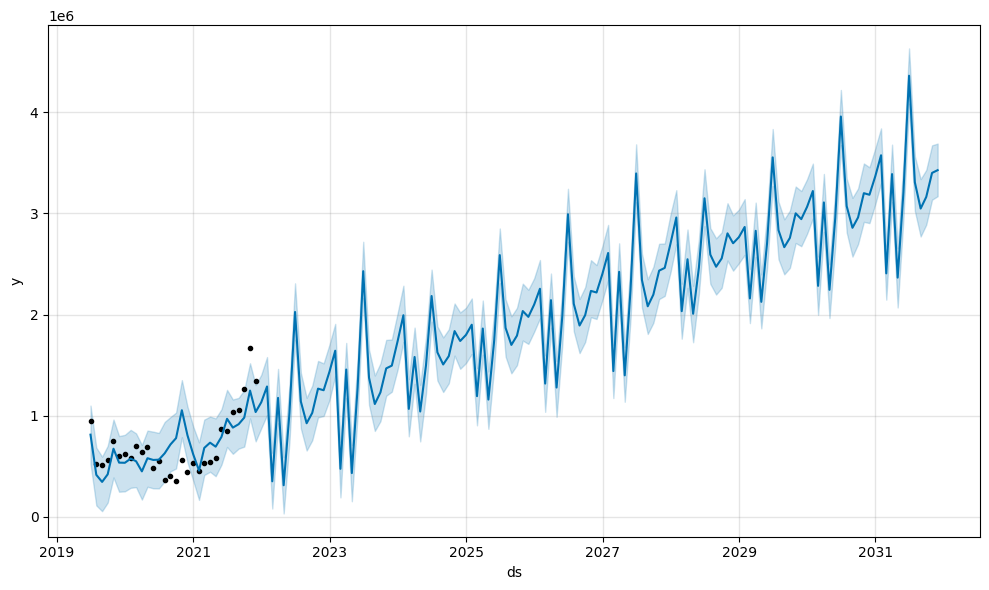

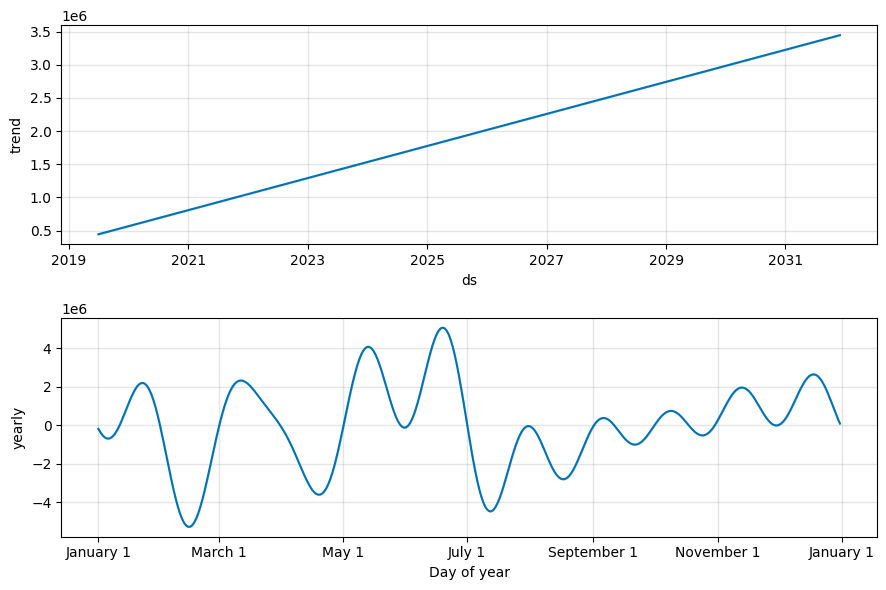

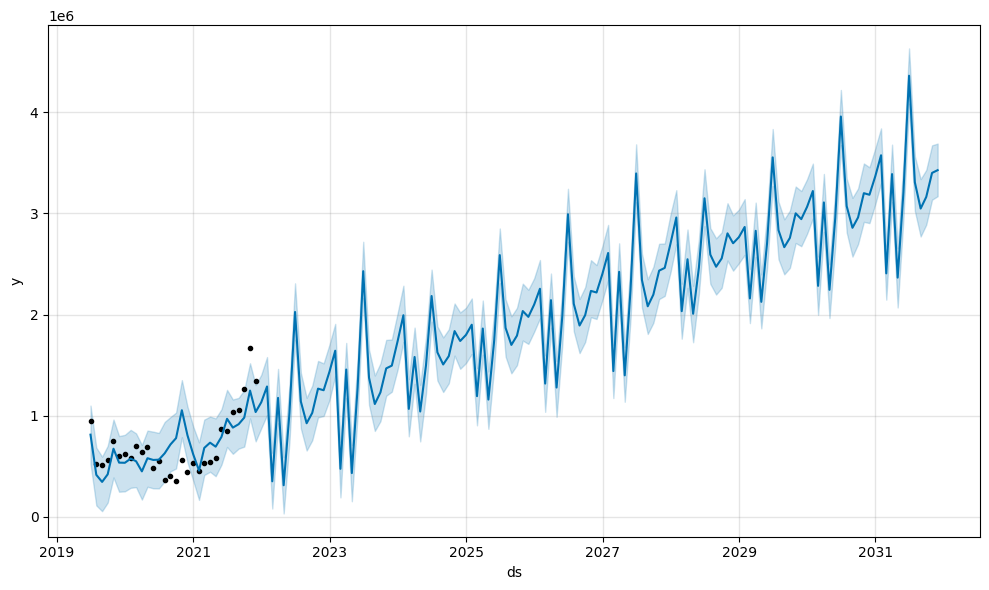

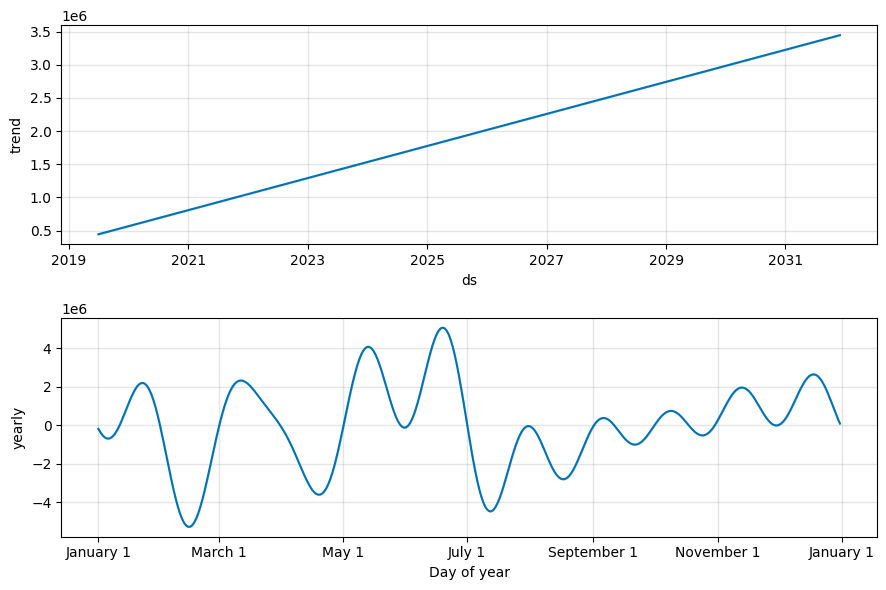

In [0]:
from prophet.plot import plot_forecast_component, plot_components

# Forecast plot (Matplotlib)
fig1 = model.plot(forecast)
display(fig1)  # Databricks will render this correctly

# Components: trend and seasonality
fig2 = model.plot_components(forecast)
display(fig2)

In [0]:
forecast_result = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
spark_forecast_df = spark.createDataFrame(forecast_result)

# Save to a table in Databricks
spark_forecast_df.write.format("delta").mode("overwrite").saveAsTable("forecast_10_years_sales")